## Challenge

1. Use python to read the csv file and create the following two charts:

    a. Pageviews by weeks for the segment
    
    b. Pageviews/user by day for the segment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
sns.set()

In [2]:
pageviews = pd.read_csv("/Users/--/Desktop/January 2019 pageviews.csv", 
                        skiprows=5, sep=',', thousands=',', nrows=31)

In [3]:
pageviews.head()

,Day Index,Pageviews
0,1/1/19,229
1,1/2/19,521
2,1/3/19,467
3,1/4/19,572
4,1/5/19,426


In [4]:
pageviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
Day Index    31 non-null object
Pageviews    31 non-null int64
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes


In [5]:
pageviews['Day Index'] = pd.to_datetime(pageviews['Day Index'])

In [6]:
pageviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
Day Index    31 non-null datetime64[ns]
Pageviews    31 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 576.0 bytes


In [7]:
new_pageviews = pageviews.groupby([
    pd.Grouper(key='Day Index', 
               freq='W-MON')])['Pageviews'].sum().reset_index().sort_values('Day Index')

In [8]:
new_pageviews

,Day Index,Pageviews
0,2019-01-07,3431
1,2019-01-14,4676
2,2019-01-21,3240
3,2019-01-28,4109
4,2019-02-04,2355


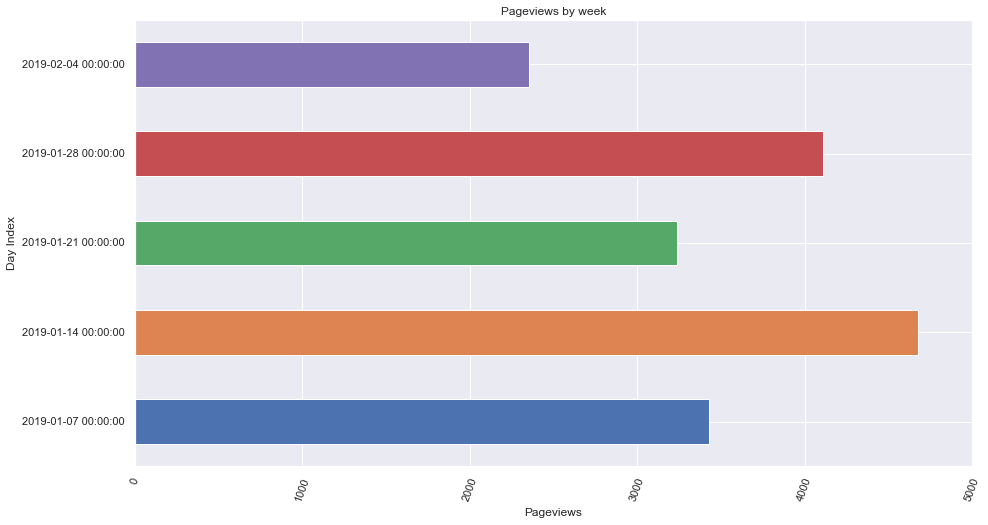

In [9]:
new_pageviews.plot(kind='barh',
            x='Day Index',
            y='Pageviews',
            figsize=(15, 8),
            title='Pageviews by week',
            legend=False)
plt.xlabel('Pageviews')
plt.ylabel('Day Index')
plt.xticks(rotation=70)

plt.savefig('pageviews.png')

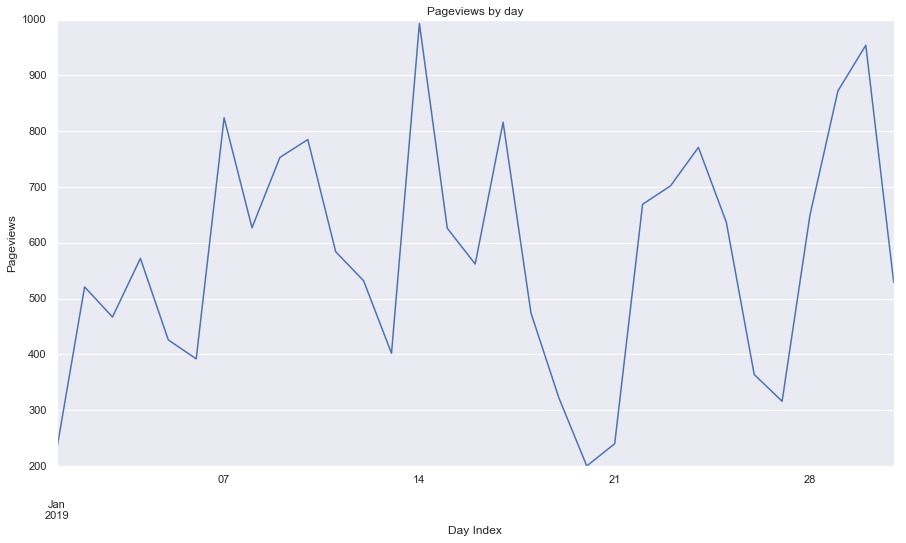

In [10]:
pageviews.plot(figsize=(15, 8), 
               x='Day Index', 
               y='Pageviews',
               title='Pageviews by day',
               legend=False)
plt.ylabel('Pageviews')
plt.xlabel('Day Index')
plt.grid(True)

plt.savefig('pageviews2.png')

In [11]:
users = pd.read_csv("/Users/--/Desktop/January 2019 users.csv", 
                        skiprows=5, sep=',', thousands=',', nrows=31)

In [12]:
users.head()

,Day Index,Users
0,1/1/19,38
1,1/2/19,98
2,1/3/19,82
3,1/4/19,88
4,1/5/19,50


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
Day Index    31 non-null object
Users        31 non-null int64
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes


In [14]:
users['Day Index'] = pd.to_datetime(users['Day Index'])

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
Day Index    31 non-null datetime64[ns]
Users        31 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 576.0 bytes


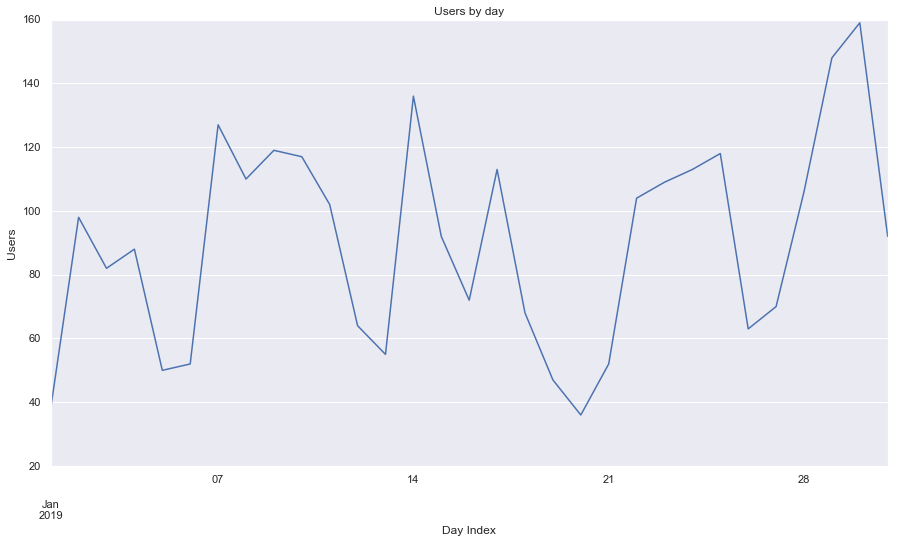

In [16]:
users.plot(figsize=(15, 8), 
               x='Day Index', 
               y='Users',
               title='Users by day',
               legend=False)
plt.ylabel('Users')
plt.xlabel('Day Index')
plt.grid(True)

plt.savefig('users.png')